In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import math
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns 

import env
from acquire import get_db_log_data
from wrangle import wrangle_df

In [2]:
#Acquire
df = get_db_log_data()
df.head(5)

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0


In [3]:
#prepare
df = wrangle_df(df)
df.head(5)

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
0,2018-01-26,2022-07-12 09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php
1,2018-01-26,2022-07-12 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php
2,2018-01-26,2022-07-12 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php
3,2018-01-26,2022-07-12 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php
4,2018-01-26,2022-07-12 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java


In [4]:
df.shape[1]

12

In [5]:
first_date = dt.datetime(2018, 12, 31)
second_date = dt.datetime(2020, 1, 1)

log_2019 = df[(df.date > first_date) & (df.date < second_date)]

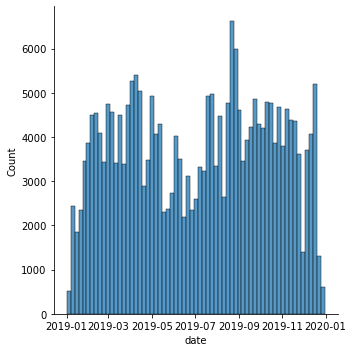

In [6]:
sns.displot(data = log_2019, x = log_2019.date);

In [7]:
df.program_id.unique()

array(['full_stack_php', 'full_stack_java', nan, 'front_end_programming',
       'data_science'], dtype=object)

In [8]:
df.program_id.isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
900218    False
900219    False
900220    False
900221    False
900222    False
Name: program_id, Length: 900223, dtype: bool

In [9]:
df.program_id.value_counts()

full_stack_java          713365
data_science             103412
full_stack_php            30548
front_end_programming         5
Name: program_id, dtype: int64

In [21]:
# Splitting the program ids into own dfs
web_dev = df[(df.program_id == 'full_stack_java') | (df.program_id == 'full_stack_php') | (df.program_id == 'front_end_programming')]
web_dev.head()

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
0,2018-01-26,2022-07-12 09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php
1,2018-01-26,2022-07-12 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php
2,2018-01-26,2022-07-12 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php
3,2018-01-26,2022-07-12 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php
4,2018-01-26,2022-07-12 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java


In [17]:
ds = df[df.program_id == 'data_science']
ds.head()

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
326053,2019-08-20,2022-07-12 09:39:58,/,466,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science
326054,2019-08-20,2022-07-12 09:39:59,/,467,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science
326055,2019-08-20,2022-07-12 09:39:59,/,468,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science
326056,2019-08-20,2022-07-12 09:40:02,/,469,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science
326057,2019-08-20,2022-07-12 09:40:08,/,470,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science


In [54]:
df.cohort_id.value_counts()

28.0     84031
33.0     40730
29.0     38096
62.0     37109
53.0     36902
24.0     35636
57.0     33844
56.0     33568
51.0     32888
59.0     32015
22.0     30926
58.0     29855
32.0     29356
23.0     28534
52.0     28033
26.0     27749
34.0     26538
25.0     25586
31.0     25359
132.0    23691
55.0     21582
27.0     20743
61.0     17713
134.0    16623
135.0    16397
133.0    14715
14.0      9587
1.0       8890
137.0     8562
21.0      7444
138.0     7276
17.0      4954
13.0      2845
18.0      2158
8.0       1712
139.0     1672
19.0      1237
16.0       755
15.0       691
7.0        598
12.0       302
11.0       253
2.0         93
6.0         72
9.0          5
4.0          4
5.0          1
Name: cohort_id, dtype: int64

In [36]:
ds.cohort_id.value_counts()

59.0     32015
34.0     26538
55.0     21582
133.0    14715
137.0     8562
Name: cohort_id, dtype: int64

In [40]:
# Create df by DS cohort
ds_cohort = df[(df.cohort_id == 59.0) | (df.cohort_id == 34.0) | (df.cohort_id == 55.0) | (df.cohort_id == 133.0) | (df.cohort_id == 137.0)]
ds_cohort.head()

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
326053,2019-08-20,2022-07-12 09:39:58,/,466,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science
326054,2019-08-20,2022-07-12 09:39:59,/,467,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science
326055,2019-08-20,2022-07-12 09:39:59,/,468,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science
326056,2019-08-20,2022-07-12 09:40:02,/,469,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science
326057,2019-08-20,2022-07-12 09:40:08,/,470,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science


5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [26]:
# active after graduation
active_grad = df[(df.date > df.end_date)]
active_grad.head()

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
0,2018-01-26,2022-07-12 09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php
1,2018-01-26,2022-07-12 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php
2,2018-01-26,2022-07-12 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php
3,2018-01-26,2022-07-12 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php
30,2018-01-26,2022-07-12 10:14:47,/,11,1.0,97.105.19.61,Arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php


In [ ]:
webs_or_data = df

In [ ]:
#.path.value_counts().head(5)

7. Which lessons are least accessed?

Questions: What are we trying to answer here? Overall least accessed? By program? By cohort? All?

### By Program

In [50]:
plot_web = web_dev.groupby('path').filter(lambda x : len(x)>100)
plot_web.path.nunique()

307

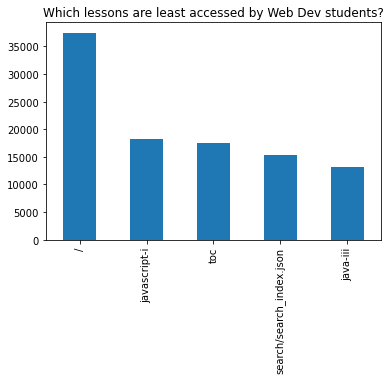

In [51]:
plot_web['path'].value_counts().head(5).plot(kind='bar')
plt.title('Which lessons are least accessed by Web Dev students?')
plt.show()

In [22]:
web_dev.path.value_counts().tail(5)

4-stats/2.7-correlation                                         1
4-python/error-handling                                         1
10-anomaly-detection/isolation-forests                          1
10-anomaly-detection/time-series-anomaly-detection-part-3       1
appendix/professional-development/post-interview-review-form    1
Name: path, dtype: int64

In [46]:
plot_ds = ds.groupby('path').filter(lambda x : len(x)>100)
plot_ds.path.nunique()

263

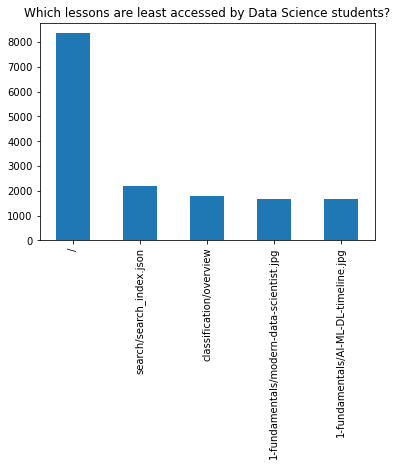

In [49]:
plot_ds['path'].value_counts().head(5).plot(kind='bar')
plt.title('Which lessons are least accessed by Data Science students?')
plt.show()

In [23]:
ds.path.value_counts().tail(5)

python/custom-sorting-functions            1
imports                                    1
java-i/console-io                          1
appendix/univariate_regression_in_excel    1
6-regression/8-Project                     1
Name: path, dtype: int64

## Answer: There are a lot of paths that were only accessed a total of 1 time, so I decided to just show 5 of those for each program.

### By Cohort

8. Anything else I should be aware of?